# Петрик і Вовк: Вступ до навчання з підкріпленням

У цьому навчальному посібнику ми навчимося застосовувати навчання з підкріпленням до задачі пошуку шляху. Сюжет натхненний музичною казкою [Петрик і Вовк](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) російського композитора [Сергія Прокоф'єва](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Це історія про юного піонера Петрика, який сміливо виходить з дому на лісову галявину, щоб переслідувати вовка. Ми будемо тренувати алгоритми машинного навчання, які допоможуть Петрику досліджувати навколишню місцевість і створити оптимальну карту навігації.

Спочатку імпортуємо набір корисних бібліотек:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Огляд навчання з підкріпленням

**Навчання з підкріпленням** (RL) — це техніка навчання, яка дозволяє нам вивчати оптимальну поведінку **агента** в певному **середовищі**, проводячи багато експериментів. Агент у цьому середовищі повинен мати певну **мету**, визначену за допомогою **функції винагороди**.

## Середовище

Для простоти розглянемо світ Пітера як квадратну дошку розміром `width` x `height`. Кожна клітинка на цій дошці може бути:
* **землею**, по якій Пітер та інші істоти можуть ходити
* **водою**, по якій, очевидно, ходити неможливо
* **деревом** або **травою** — місцем, де можна відпочити
* **яблуком**, яке є тим, що Пітер буде радий знайти, щоб нагодувати себе
* **вовком**, який є небезпечним і якого слід уникати

Для роботи із середовищем ми визначимо клас `Board`. Щоб не перевантажувати цей ноутбук зайвим кодом, ми перенесли весь код для роботи з дошкою в окремий модуль `rlboard`, який зараз імпортуємо. Ви можете заглянути всередину цього модуля, щоб отримати більше деталей про внутрішню реалізацію.


Давайте тепер створимо випадкову дошку і подивимося, як вона виглядає:


In [4]:
# code block 1

## Дії та Політика

У нашому прикладі мета Пітера — знайти яблуко, уникаючи вовка та інших перешкод. Визначте ці дії як словник і зіставте їх із парами відповідних змін координат.


In [5]:
# code block 2

Стратегія нашого агента (Пітера) визначається так званою **політикою**. Розглянемо найпростішу політику, яка називається **випадкова прогулянка**.

## Випадкова прогулянка

Спочатку вирішимо нашу задачу, реалізувавши стратегію випадкової прогулянки.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Функція винагороди

Щоб зробити нашу політику більш розумною, нам потрібно зрозуміти, які ходи є "кращими" за інші.


In [8]:
#code block 5

## Q-Learning

Створіть Q-таблицю або багатовимірний масив. Оскільки наша дошка має розміри `width` x `height`, ми можемо представити Q-таблицю за допомогою numpy-масиву з формою `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Передайте Q-таблицю до функції `plot`, щоб візуалізувати таблицю на дошці:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Суть Q-Learning: Рівняння Беллмана та алгоритм навчання

Напишіть псевдокод для нашого алгоритму навчання:

* Ініціалізуйте Q-таблицю Q однаковими значеннями для всіх станів і дій
* Встановіть швидкість навчання $\alpha\leftarrow 1$
* Повторюйте симуляцію багато разів
   1. Почніть з випадкової позиції
   1. Повторюйте
        1. Виберіть дію $a$ у стані $s$
        2. Виконайте дію, перейшовши до нового стану $s'$
        3. Якщо ми досягаємо умови завершення гри або загальна винагорода занадто мала — завершити симуляцію  
        4. Обчисліть винагороду $r$ у новому стані
        5. Оновіть Q-функцію відповідно до рівняння Беллмана: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Оновіть загальну винагороду та зменшіть $\alpha$.

## Експлуатація vs. Дослідження

Найкращий підхід — це баланс між дослідженням і експлуатацією. У міру того, як ми більше дізнаємося про наше середовище, ми будемо більш схильні слідувати оптимальному маршруту, однак, час від часу варто обирати невивчений шлях.

## Реалізація на Python

Тепер ми готові реалізувати алгоритм навчання. Перед цим нам також потрібна функція, яка перетворить довільні числа в Q-таблиці на вектор ймовірностей для відповідних дій:


In [10]:
# code block 7

Ми додаємо невелику кількість `eps` до початкового вектора, щоб уникнути ділення на 0 у початковому випадку, коли всі компоненти вектора однакові.

Фактичний алгоритм навчання, який ми будемо виконувати протягом 5000 експериментів, також називається **епохами**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Після виконання цього алгоритму таблиця Q повинна бути оновлена значеннями, які визначають привабливість різних дій на кожному кроці. Візуалізуйте таблицю тут:


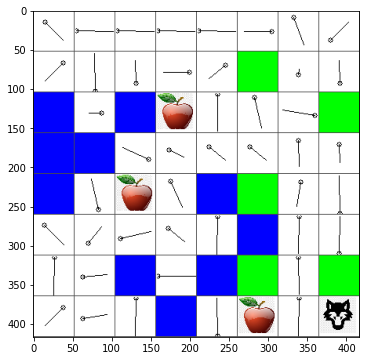

In [43]:
m.plot(Q)

## Перевірка політики

Оскільки Q-таблиця відображає "привабливість" кожної дії в кожному стані, її досить легко використовувати для визначення ефективної навігації у нашому світі. У найпростішому випадку ми можемо просто вибрати дію, що відповідає найвищому значенню в Q-таблиці:


In [13]:
# code block 9

2

Якщо ви спробуєте код вище кілька разів, ви можете помітити, що іноді він просто "зависає", і вам потрібно натиснути кнопку STOP у блокноті, щоб перервати його.

> **Завдання 1:** Змініть функцію `walk`, щоб обмежити максимальну довжину шляху певною кількістю кроків (наприклад, 100), і спостерігайте, як код вище час від часу повертає це значення.

> **Завдання 2:** Змініть функцію `walk`, щоб вона не поверталася до місць, де вже була раніше. Це запобігатиме зацикленню `walk`, однак агент все одно може опинитися "застряглим" у місці, з якого він не може вибратися.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


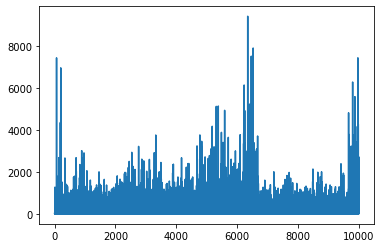

In [57]:
plt.plot(lpath)

## Вправа
## Більш реалістичний світ "Петрик і Вовк"



---

**Відмова від відповідальності**:  
Цей документ було перекладено за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, зверніть увагу, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ мовою оригіналу слід вважати авторитетним джерелом. Для критично важливої інформації рекомендується професійний переклад людиною. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникли внаслідок використання цього перекладу.
